# Import Libraries

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from gensim.models import KeyedVectors

# Read the dataset

In [4]:
df = pd.read_csv('moviereviews.tsv', sep='\t')

In [5]:
df

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...



# Check the Null Values

In [6]:
df.isnull().any()

label     False
review     True
dtype: bool

In [7]:
df.dropna(inplace = True)

In [8]:
df.isnull().any()

label     False
review    False
dtype: bool

# Check if the data is balance

In [9]:
df['label'].value_counts()

label
neg    983
pos    982
Name: count, dtype: int64

# Change the columns name to labels and text

In [10]:
df.columns = ['labels', 'text']

# Convert labels to integers

In [11]:
df['labels'] = df['labels'].map({'pos': 0, 'neg': 1})

In [12]:
df.head()

,labels,text
0,1,how do films like mouse hunt get into theatres...
1,1,some talented actresses are blessed with a dem...
2,0,this has been an extraordinary year for austra...
3,0,according to hollywood movies made in last few...
4,1,my first press screening of 1998 and already i...


# Extract features and labels

In [13]:
features = df['text']
labels = df['labels']

# Split the data into training and testing

In [14]:
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

# Import Word2Vec Vectorizer

In [15]:
from Word2VecVectorizer import Word2VecVectorizer

In [16]:
vectorizer = Word2VecVectorizer() # Create the instance of Word2Vec vectorizer

Loading in word vectors...
Finished loading in word vectors


# Vectorize Training and Testing data

In [24]:
Xtrain = vectorizer.fit_transform(train_data)
Xtest = vectorizer.transform(test_data)

Numer of samples with no words found: 21 / 1572
Numer of samples with no words found: 6 / 393


# Instantiate the model and train it

In [25]:
model = RandomForestClassifier()
model.fit(Xtrain, train_labels)

RandomForestClassifier()

In [26]:
y_pred = model.predict(Xtest)

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

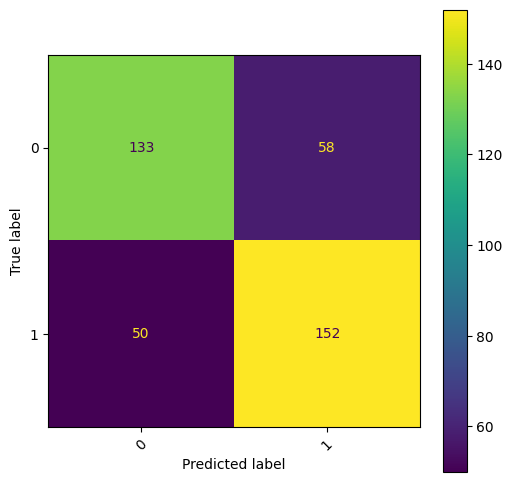

In [28]:
cm = confusion_matrix(test_labels, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(6)
fig.set_figheight(6)
plt.show()

In [29]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [30]:
print("Accuracy : %2.2f" % (accuracy_score(test_labels, y_pred, normalize=True)))
print("Precision : %2.2f" % (precision_score(test_labels, y_pred, average = 'macro')))
print("Recall : %2.2f" % (recall_score(test_labels, y_pred, average = 'macro')))
print("F1_Score : %2.2f" % (f1_score(test_labels, y_pred, average = 'macro')))

Accuracy : 0.73
Precision : 0.73
Recall : 0.72
F1_Score : 0.72
